In [1]:
from tnia.deconvolution.psfs import gibson_lanni_3D
from tnia.plotting.projections import show_xyz_max
from tnia.io.tifffile_helper import open_ij3D
from clij2fft.richardson_lucy import richardson_lucy, richardson_lucy_nc
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np

In [2]:
input_name="D:\\images\\ABRF LMRG Image Analysis Study\\nuclei\\nuclei1_out_c00_dr90_image.tif" 
input_name="D:\\images\\ABRF LMRG Image Analysis Study\\nuclei\\nuclei4_out_c90_dr10_image.tif"
input_name="D:\\images\\ABRF LMRG Image Analysis Study\\nuclei\\nuclei2_out_c90_dr90_image.tif"
decon_name="D:\\images\\ABRF LMRG Image Analysis Study\\nuclei\\nuclei2_out_c90_dr90_image_decon.tif"
im, x_voxel_size, y_voxel_size, z_voxel_size = open_ij3D(input_name)

In [3]:
print(x_voxel_size, z_voxel_size)
print(im.shape)

0.1238060147933331 0.2
(100, 258, 258)


C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\microscPSF\microscPSF.py:214: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  C, residuals, _, _ = numpy.linalg.lstsq(J.T, phase.T)


(100, 64, 64)


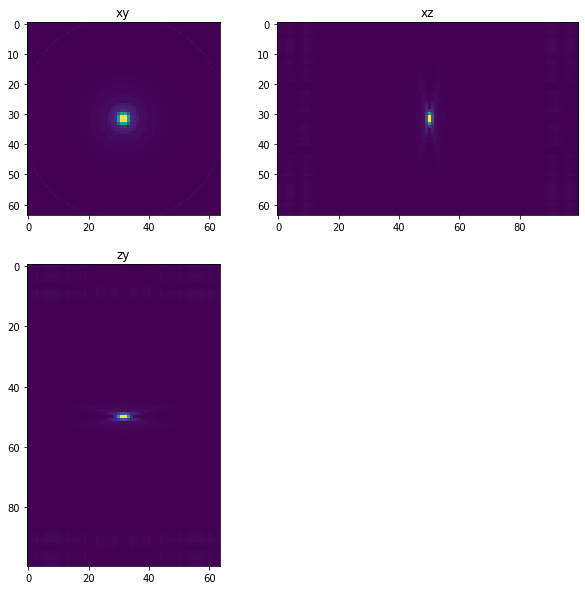

In [4]:
x_voxel_size=.100
z_voxel_size=.800

xy_psf_dim=64
z_psf_dim=100

NA=0.75
ni=1
ns=1

psf = gibson_lanni_3D(NA, ni, ns, x_voxel_size, z_voxel_size, xy_psf_dim, z_psf_dim, 0, 0.45)
psf = psf.astype('float32')
#psf = gibson_lanni_3D(NA, ni, ns, xy_pixel_size, xy, zv, 0, 0.65)
#plt.imshow(psf_xyz[int(size[0]/2),:,:])
show_xyz_max(psf)
print(psf.shape)

In [5]:
from skimage.io import imsave
imsave('D:\\images\\ABRF LMRG Image Analysis Study\\nuclei\\psf.tif', psf)

C:\Users\bnort\AppData\Local\Temp/ipykernel_15016/2020955070.py:2: UserWarning: D:\images\ABRF LMRG Image Analysis Study\nuclei\psf.tif is a low contrast image
  imsave('D:\\images\\ABRF LMRG Image Analysis Study\\nuclei\\psf.tif', psf)


In [6]:
psf.dtype

dtype('float32')

In [7]:
decon1=richardson_lucy_nc(im, psf, 200, 0)
decon2=richardson_lucy(im, psf, 200, 0)


get lib
get lib


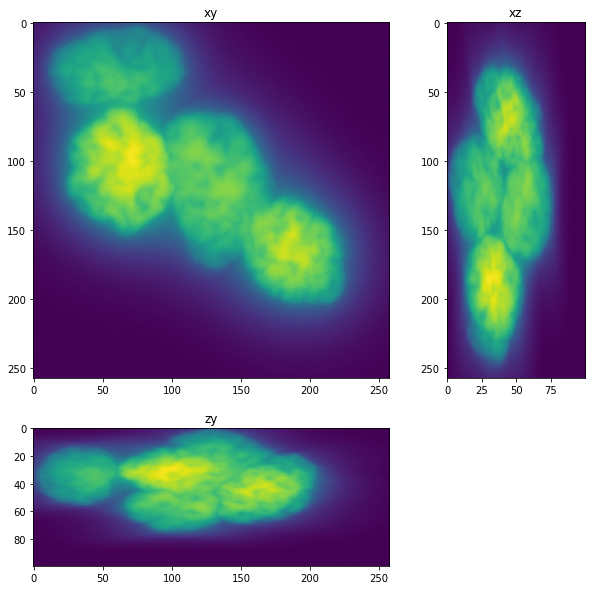

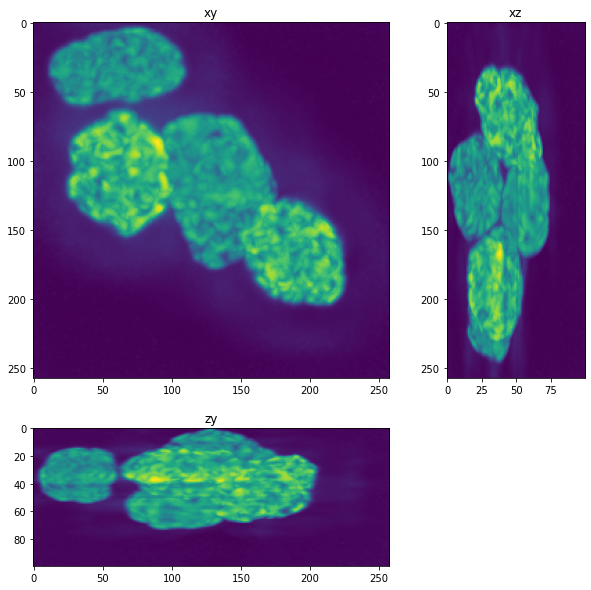

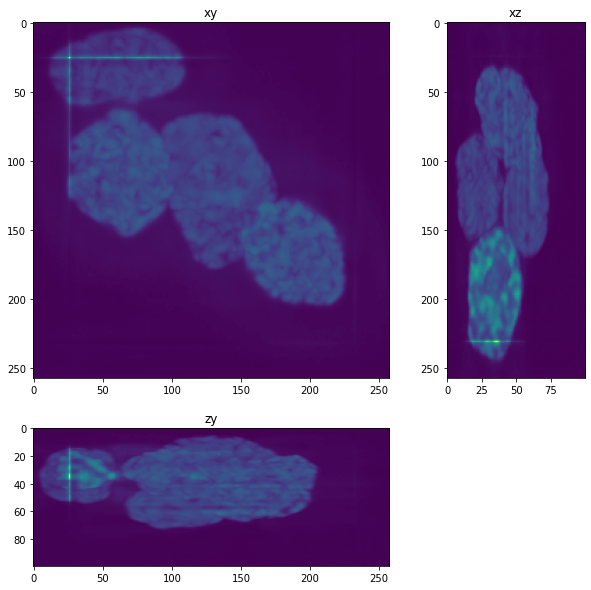

In [8]:
show_xyz_max(im)
show_xyz_max(decon1)
fig=show_xyz_max(decon2)

In [71]:
imsave(decon_name, decon1)

C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\_future.py:466: RuntimeWarning: coroutine 'get_msg' was never awaited
  if not self._shadow_sock.get(EVENTS) & POLLIN:


In [10]:
from tnia.viewing.napari_helper import show_image

In [11]:
viewer=show_image(decon1, 'deconvolved')
viewer=show_image(im, 'image', viewer=viewer)

C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\napari\_qt\__init__.py:54: UserWarning: 

IMPORTANT:
You are using QT version 5.9.7, but version 5.15.4 was also found in your environment.
This usually happens when you 'conda install' something that also depends on PyQt
*after* you have pip installed napari (such as jupyter notebook).
You will likely run into problems and should create a fresh environment.
If you want to install conda packages into the same environment as napari,
please add conda-forge to your channels: https://conda-forge.org

  warn(message=warn_message)
